- Content: Taste Sources' exploration -- moving average, co-occurrencies, pmi-based analysis of co-occurrencies, co-occurring taste sources
- Author: Teresa Paccosi
- Paper: 'Tracing Taste over Time: Automatic Extraction and Diachronic Analysis of Gustatory Language in English' by Teresa Paccosi, and Sara Tonelli

In [1]:
import pandas as pd

In [2]:
df = pd.read_table('taste_final.tsv')

# Moving Average
[See the time distribution of a specific Taste Source within the selected dataset. If you want to see the distribution in time of the entire selected dataset, leave the corresponding field empty and click on run]

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

df = pd.read_table('taste_final.tsv')

def mobile_average(targets):
    window_size = 10  # year window
    targets = [x.lower() for x in targets]
    
    # Fiter the data -- just taste_source
    df_target = df.dropna(subset=['Taste_Source_cleaned'])
    pat = '|'.join(r"\b{}\b".format(x) for x in targets)
    df_target = df_target[df_target['Taste_Source_cleaned'].str.contains(pat, na=False)]
    
    # Count occurrences per year
    freq_dict = dict()
    for y in df_target["year"].dropna().values.tolist():
        year_int = int(y) if not pd.isna(y) else None
        if year_int is not None:
            if year_int not in freq_dict:
                freq_dict[year_int] = 0
            freq_dict[year_int] += 1
    
    # moving average
    average_dict = dict()
    for year in freq_dict:
        sum = 0
        for y in range(year - window_size, year + window_size + 1):
            if y in freq_dict:
                sum += freq_dict[y]
        average_dict[year] = sum / (2 * window_size + 1)  # Media mobile su finestra di 10 anni
    return average_dict

def reset_run_mobile_average(name):
    clear_output()
    run_mobile_average()

def run_mobile_average():
    def call_mobile_average(name):
        source = sources.value
        source = source.replace(" ", "")
        targets = source.split(",") 
        av_dict = mobile_average(targets)

        result = av_dict.items()
        data = list(result)
        numpyArray = np.array(data)
        
        if len(numpyArray) != 0:
            numpyArray = numpyArray[numpyArray[:, 0].argsort()]
            plt.xlim(1700, 2000)  # modify according to your data [time window]
            plt.plot(numpyArray[:, 0], numpyArray[:, 1], 'g', linestyle='--')
            plt.xlabel('Year')
            plt.ylabel('Occurrences')
            if sources.value == '':
                plt.title('All data')
            else:
                plt.title(f'Taste Source: {sources.value}')
            plt.show()
        else:
            display()
            display('No data found')

    sources = widgets.Text(value='', description='Taste Source')
    sendButton = widgets.Button(description='Plot')
    resetButton = widgets.Button(description='Reset')

    sendButton.on_click(call_mobile_average)
    resetButton.on_click(reset_run_mobile_average)
    
    display(sources)
    display(sendButton, resetButton)


Text(value='', description='Taste Source')

Button(description='Plot', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

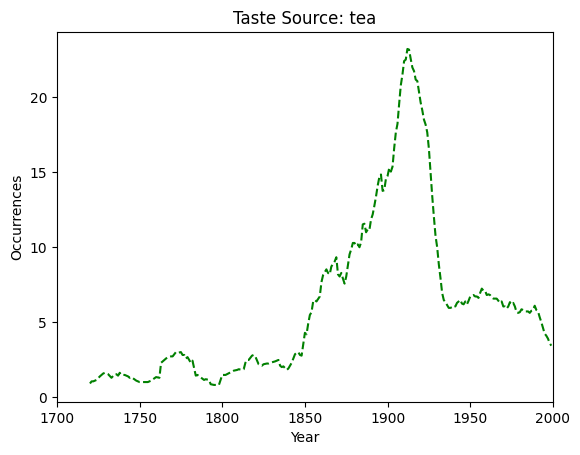

In [4]:
run_mobile_average()

# See Example Sentences
[Show the data for a specific Taste Source within the dataset]

In [5]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import clear_output, display

def reset_run_extract_examples(name):
    clear_output()
    run_extract_examples()

def run_extract_examples():
    def call_extract_taste_sources_instances(name):
        source = sources.value
        source = source.replace(" ", "")  
        targets = source.split(",") 

        df_filtered = df[df['Taste_Source_cleaned'].str.contains('|'.join(targets), case=False, na=False)]
        
        time_span_start = slider1.value[0]
        time_span_end = slider1.value[1]
        df_filtered = df_filtered[(df_filtered['year'] >= time_span_start) & (df_filtered['year'] <= time_span_end)]

        if len(df_filtered) == 0:
            display("No data found for the selected taste sources and time span.")
            return
        
        if name.description == 'Export Tsv':
            filename = "_".join(targets) + "_taste_sources_instances.tsv"
            df_filtered.to_csv(filename, sep='\t', index=False)
            display(f"Data exported to '{filename}'")
        else:
            display(df_filtered.head(10)) # it shows the first 10 sentences, you can modify

    def add_span(name):
        if slider2.layout.visibility == "hidden":
            slider2.layout.visibility = "visible"
        else:
            slider3.layout.visibility = "visible"

   
    slider1 = widgets.IntRangeSlider(value=[1700, 1800], min=1700, max=2000, step=10, description='Time Span:')
    slider2 = widgets.IntRangeSlider(value=[1700, 1800], min=1700, max=2000, step=10, description='Time Span:')
    slider3 = widgets.IntRangeSlider(value=[1700, 1800], min=1700, max=2000, step=10, description='Time Span:')
    sources = widgets.Text(value='', description='Taste Source')

    slider1.layout.visibility = "visible"
    slider2.layout.visibility = "hidden"
    slider3.layout.visibility = "hidden"

    sliderlist = [slider1, slider2, slider3]
    addButton = widgets.Button(description='Add time span')
    showButton = widgets.Button(description='Show Selection')
    sendButton = widgets.Button(description='Export Tsv')
    resetButton = widgets.Button(description='Reset')

    addButton.on_click(add_span)
    sendButton.on_click(call_extract_taste_sources_instances)
    showButton.on_click(call_extract_taste_sources_instances)
    resetButton.on_click(reset_run_extract_examples)

    display(sources)
    for w in sliderlist:
        display(w)
    display(addButton, showButton, sendButton, resetButton)

In [6]:
run_extract_examples()

Text(value='', description='Taste Source')

IntRangeSlider(value=(1700, 1800), description='Time Span:', layout=Layout(visibility='visible'), max=2000, mi…

IntRangeSlider(value=(1700, 1800), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntRangeSlider(value=(1700, 1800), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

Button(description='Add time span', style=ButtonStyle())

Button(description='Show Selection', style=ButtonStyle())

Button(description='Export Tsv', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

,Book,Taste_Word,Taste_Source,Quality,Taste_Carrier,Evoked_Taste,Location,Taster,Taste_Modifier,Circumstances,Effect,SentenceBefore,Sentence,SentenceAfter,year,Sentence_clean,Taste_Source_cleaned
31350,ob4,drank|drink,his tea|his tea,NaN,NaN,NaN,NaN,he,NaN,NaN,NaN,The prisoner is my son ; he lives with me ; he...,On Saturday he had been at work at Vauxhall - ...,When he had drank his tea I sent him over the ...,1777.0,saturday work vauxhall bridge discharge evenin...,tea|tea
31351,ob4,drank,his tea,NaN,NaN,NaN,NaN,he,NaN,NaN,NaN,On Saturday he had been at work at Vauxhall - ...,When he had drank his tea I sent him over the ...,Wardour to borrow a basket for me to carry two...,1777.0,drink tea send way mr,tea
31432,ob12,drank|drink,your tea|any tea,NaN,NaN,NaN,NaN,I,NaN,that afternoon,NaN,Q .,Had you drank your tea that afternoon ? - I ve...,Q .,1795.0,drank tea afternoon seldom drink tea,tea|tea
31582,ob32,drank|drink,a cup or two of tea|punch,NaN,NaN,NaN,into the prisoner ' s house,I|I,NaN,NaN,NaN,OLLA HANSON sworn .,"- On the 18th of August , I went into the pris...","Davies ' s , in New Gravel - lane , I would sp...",1748.0,august go prisoner s house ask baron soup brea...,cup|tea|punch
31586,ob32,drink|drank|drink,tea|tea,NaN,NaN,NaN,in the room|in the apartment,two friends|the prisoner Gladwell|Gladwell,NaN,the preceding evening,NaN,I reside in the house of Mr .,"Alexander Osbaldiston , in New Bond - street ;...","Tolfrey , guided by his advice , I took Yates ...",1748.0,alexander osbaldiston new bond street barriste...,tea|tea
31587,ob32,drink,tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HENRY WHITE sworn .,- I am a peace - officer for Mary - le - bonne...,"Morse ' s ; he said , you know Yates is a very...",1748.0,peace officer mary le bonne parish let furnish...,tea
31588,ob32,drank,tea,NaN,NaN,NaN,NaN,we,NaN,NaN,NaN,Morse ' s bed - room ; we went into the bed - ...,"Morse ' s bason ; he washed his hands , and I ...",You always found him very honest ? - A .,1748.0,morse s bason wash hand wash pot pomatum stand...,tea
31685,ob45,drank|sweet|sweet|drank,the tea|it,not sweet|sweet,NaN,NaN,NaN,the child|my,NaN,NaN,NaN,Williamson .,My father had saved some tea for my little bro...,"Once , when my father ' s back was turned , sh...",1728.0,father save tea little brother drink tea water...,tea
31694,ob45,partake|drank,tea|of it,NaN,the pot,NaN,NaN,she,NaN,NaN,NaN,Prisoner .,"We had some tea , and I left some for my littl...",Cole .,1728.0,tea leave little boy order partake drink fill ...,tea
31723,ob48,drink,some mint and balm tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,She asked me to get her something to drink ; a...,I said I wou ' d make her some mint and balm t...,I said I would get her any thing else .,1773.0,say wou d mint balm tea say drink,mint|balm|tea


# PMI co-occurrences of Quality and Taste Source

[Extract the qualities with the highest PMI scores associated with a target Taste Source]

In [ ]:
import math
import pandas as pd
from IPython.display import display, clear_output
import ipywidgets as widgets
from itertools import islice

def pmi_taste_sources(targets, spans, top_n, download):
    targets = [x.lower() for x in targets]
    
    if download:
        filename = "_".join(targets) + "-pmi_taste_sources.tsv"
        with open(filename, 'w', encoding='utf-8') as f:
            f.write("Quality\tPMI_score\n")  # Scrive l'intestazione del file

    for span in spans:
        lower_limit, upper_limit = span.split("-")

        df = pd.read_table('taste_final.tsv')
        df_selection = df.loc[(df["year"] >= int(lower_limit)) & (df["year"] <= int(upper_limit))]
        df_selection["sentencewords"] = df_selection["Sentence_clean"].apply(lambda n: len(n.split()))
        total_words = df_selection['sentencewords'].sum()

        freq_quality = count_form_list(df_selection["Quality"].dropna().values.tolist())

        df_source = df_selection.dropna(subset=['Taste_Source_cleaned'])
        pat = '|'.join(r"\b{}\b".format(x) for x in targets)
        df_source = df_source[df_source['Taste_Source_cleaned'].str.contains(pat)]

        freq_target = len(df_source)
        
        freq_cooc = count_form_list(df_source["Quality"].dropna().values.tolist())

        pmiDict = dict()

        for quality in freq_cooc:
            if freq_cooc[quality] > 5 and len(quality) > 0: 
                pxy = freq_cooc[quality] / total_words
                px = freq_target / total_words
                py = freq_quality[quality] / total_words
                pmi_value = math.log2(pxy / (px * py)) 
                pmiDict[quality] = pmi_value

        df_pmi = pd.DataFrame(take_top(top_n, pmiDict), columns=['Quality', 'PMI_score'])

        if download:
            with open(filename, 'a', encoding='utf-8') as f:
                for index, row in df_pmi.iterrows():
                    f.write(f"{row['Quality']}\t{row['PMI_score']}\n")
        else:
            print()
            print('----------------------')
            print()
            print(f'Results for {span} span, and targets {targets}')
            display(df_pmi)

    
    if download:
        display(f"File {filename} has been created and saved.")


def count_form_list(mylist):
    freq_dict = dict()
    for item in mylist:
        for word in item.lower().split("|"):
            for w in word.split(" "):
                if w not in freq_dict:
                    freq_dict[w] = 0
                freq_dict[w] += 1
    return freq_dict

def take_top(top_n, myDict):
    sorted_pmiDict = sorted(myDict.items(), key=lambda x: x[1], reverse=True)
    converted_dict = dict(sorted_pmiDict)
    return list(islice(converted_dict.items(), top_n))

def run_pmi_taste_sources():
    def call_pmi_taste_sources(name):
        source = sources.value
        source = source.replace(" ", "")  
        targets = source.split(",") 

        spans = []
        for w in sliderlist:
            if w.layout.visibility == "visible":
                mySpan = str(w.value[0]) + "-" + str(w.value[1])
                spans.append(mySpan)
        
        top_n_value = top_n_slider.value

        if name.description == 'Export TSV':
            pmi_taste_sources(targets, spans, top_n_value, True)
        else:
            pmi_taste_sources(targets, spans, top_n_value, False)

    def add_span(name):
        if slider2.layout.visibility == "hidden":
            slider2.layout.visibility = "visible"
        else:
            slider3.layout.visibility = "visible"

    style = {'description_width': 'initial'}
    

    slider1 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')
    slider2 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')
    slider3 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')
    sources = widgets.Text(value='', description='Taste Source')

    top_n_slider = widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N:')

    slider1.layout.visibility = "visible"
    slider2.layout.visibility = "hidden"
    slider3.layout.visibility = "hidden"

    sliderlist = [slider1, slider2, slider3]
    addButton = widgets.Button(description='Add time span')
    showButton = widgets.Button(description='Show Selection')
    sendButton = widgets.Button(description='Export TSV')
    resetButton = widgets.Button(description='Reset')

    addButton.on_click(add_span)
    sendButton.on_click(call_pmi_taste_sources)
    showButton.on_click(call_pmi_taste_sources)
    resetButton.on_click(reset_run_pmi_taste_sources)

    display(sources, top_n_slider)
    for w in sliderlist:
        display(w)
    display(addButton, showButton, sendButton, resetButton)

def reset_run_pmi_taste_sources(name):
    clear_output()
    run_pmi_taste_sources()

In [8]:
run_pmi_taste_sources()

Text(value='', description='Taste Source')

IntSlider(value=10, description='Top N:', max=20, min=1)

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='visible'), max=2000, mi…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

Button(description='Add time span', style=ButtonStyle())

Button(description='Show Selection', style=ButtonStyle())

Button(description='Export TSV', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())


----------------------

Results for 1700-2000 span, and targets ['tea']


/var/folders/j8/2fw1pn3n4zb1y5l8gt8s56dc0000gn/T/ipykernel_66825/1415400609.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection["sentencewords"] = df_selection["Sentence_clean"].apply(lambda n: len(n.split()))


,Quality,PMI_score
0,unsweetened,6.985431
1,sweetened,6.848250
2,flavoured,6.766596
3,delicate,6.082415
4,flavored,6.032055
5,unpleasant,5.791951
6,strong,5.748601
7,fine,5.546241
8,tasty,5.390370
9,delicious,5.369357


# Frequency of co-occurrencies for a target Taste Source

In [9]:
def reset_run_extract_taste_sources_cooc_window(name):
    clear_output()
    run_extract_taste_sources_cooc_window()

def run_extract_taste_sources_cooc_window():

    def call_extract_taste_sources_cooc_window(name):
        source = sources.value
        source = source.replace(" ", "")
        targets = source.split(",")
        spans = []
        
        for w in sliderlist:
            if w.layout.visibility == "visible":
                mySpan = str(w.value[0]) + "-" + str(w.value[1])
                spans.append(mySpan)

        top_n = slidercooc.value  
        window_size = sliderwindow.value 

        if name.description == 'Export TSV':
            extract_taste_sources_cooc_window(targets, spans, window_size, top_n, True)
        else:
            extract_taste_sources_cooc_window(targets, spans, window_size, top_n, False)

    def add_span(name):
        if slider2.layout.visibility == "hidden":
            slider2.layout.visibility = "visible"
        else:
            slider3.layout.visibility = "visible"

    style = {'description_width': 'initial'}
    
    
    slider1 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')
    slider2 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')
    slider3 = widgets.IntRangeSlider(value=[1700, 2000], min=1700, max=2000, step=10, description='Time Span:')

    
    slidercooc = widgets.IntSlider(value=10, min=10, max=300, step=1, description='Number of co-occurrences:', style=style)
    
    
    sliderwindow = widgets.IntSlider(value=3, min=1, max=10, step=1, description='Window size', style=style)

    
    sources = widgets.Text(value='', description='Taste Source')

    slider1.layout.visibility = "visible"
    slider2.layout.visibility = "hidden"
    slider3.layout.visibility = "hidden"

    sliderlist = [slider1, slider2, slider3]
    

    addButton = widgets.Button(description='Add time span')
    showButton = widgets.Button(description='Show Selection')
    sendButton = widgets.Button(description='Export TSV')
    resetButton = widgets.Button(description='Reset')

    addButton.on_click(add_span)
    sendButton.on_click(call_extract_taste_sources_cooc_window)
    showButton.on_click(call_extract_taste_sources_cooc_window)
    resetButton.on_click(reset_run_extract_taste_sources_cooc_window)

    display(sources)
    for w in sliderlist:
        display(w)
    display(slidercooc)
    display(sliderwindow)
    display(addButton, showButton, sendButton, resetButton)

def extract_taste_sources_cooc_window(targets, spans, window_size, top_n, download):
    targets = [x.lower() for x in targets]
    
    if download:
        filename = "_".join(targets) + "-taste_sources_cooc.tsv"
        with open(filename, 'w') as f:
            f.write("Taste_Source\tCo-occurrence\tFrequency\n")
    
    for span in spans:
        lower_limit, upper_limit = span.split("-")
        
        df =pd.read_table('taste_final.tsv')
        df_selection = df.loc[(df["year"] >= int(lower_limit)) & (df["year"] <= int(upper_limit))]

        cooc_dict = dict()

        for index, row in df_selection.iterrows():
            sentence_words = row['Sentence_clean'].split()
            for i, word in enumerate(sentence_words):
                if word.lower() in targets:  
                    window_start = max(i - window_size, 0)
                    window_end = min(i + window_size + 1, len(sentence_words))
                    context = sentence_words[window_start:i] + sentence_words[i+1:window_end]
                    
                    for context_word in context:
                        if context_word.lower() not in targets:
                            if context_word.lower() not in cooc_dict:
                                cooc_dict[context_word.lower()] = 0
                            cooc_dict[context_word.lower()] += 1

        sorted_cooc = sorted(cooc_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]

        if download:
            with open(filename, 'a') as f:
                for word, freq in sorted_cooc:
                    f.write(f"{', '.join(targets)}\t{word}\t{freq}\n")
        else:
            print(f"Co-occurrences for time span {span}:")
            for word, freq in sorted_cooc:
                print(f"{word}: {freq}")

In [10]:
run_extract_taste_sources_cooc_window()

Text(value='', description='Taste Source')

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='visible'), max=2000, mi…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntSlider(value=10, description='Number of co-occurrences:', max=300, min=10, style=SliderStyle(description_wi…

IntSlider(value=3, description='Window size', max=10, min=1, style=SliderStyle(description_width='initial'))

Button(description='Add time span', style=ButtonStyle())

Button(description='Show Selection', style=ButtonStyle())

Button(description='Export TSV', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Co-occurrences for time span 1700-2000:
drink: 1334
cup: 280
coffee: 208
eat: 185
sugar: 142
come: 130
s: 127
taste: 125
water: 123
go: 119


# Taste Sources most frequently co-occurring with another Taste Source

In [11]:
def reset_call_pmi_span_taste_sources(name):
  clear_output()
  run_cooc_taste_sources()

def pmi_span_taste_sources (targets, spans, top_n, download):
  targets = [x.lower() for x in targets]
  if download ==True:
    filename = "_".join(targets)+"-pmi.xlsx"
    writer = pd.ExcelWriter(filename, engine = 'xlsxwriter')
  for span in spans:

    lower_limit,upper_limit = span.split("-")

    df = pd.read_table('taste_final.tsv')
    df_selection = df.loc[(df["year"] >= int(lower_limit)) & (df["year"] <= int(upper_limit))]
    df_selection["sentencewords"] = df_selection["Sentence_clean"].apply(lambda n: len(n.split()))

    total_words = df_selection['sentencewords'].sum()
    freq_quality = count_form_list(df_selection["Taste_Source_cleaned"].dropna().values.tolist())

    df_source = df_selection.dropna(subset=['Taste_Source_cleaned'])
    pat = '|'.join(r"\b{}\b".format(x) for x in targets)
    df_source = df_source[df_source['Taste_Source_cleaned'].str.contains(pat)]

    freq_target = len(df_source)
    freq_cooc = count_form_list(df_source["Taste_Source_cleaned"].dropna().values.tolist())

    pmiDict = dict()
    for quality in freq_cooc:
        if  len(quality)>1:
          pmiDict[quality] = freq_cooc[quality]
    df_pmi = pd.DataFrame(take_top(top_n, pmiDict), columns =['Taste Source', 'Frequency'])

    if download ==True:
      df_pmi.to_excel(writer, sheet_name=span, index = False)
    else:
      print()
      print('-------------------------')
      print()
      print('Results for '+ str(span) +' span, and targets  '+ str(targets))
      display(df_pmi)
  if download ==True:
    writer.close()
    files.download(filename)

def run_cooc_taste_sources():

  def call_pmi_span_taste_sources(name):
    source = sources.value
    source = source.replace(" ", "")
    targets = source.split(",")
    spans = []
    for w in sliderlist:
      if w.layout.visibility == "visible":

        mySpan = str(w.value[0])+"-"+str(w.value[1])
        spans.append(mySpan)
    top_n = slidercooc.value
    if name.description =='Export Excel':
      pmi_span_taste_sources(targets, spans, top_n,True)
    else:
      pmi_span_taste_sources(targets, spans, top_n,False)


  def read_values(name):
    print(slider1.value)
    print(slider2.value)
    print(slider3.value)
    print(sources.value)


  def add_span(name):
    if slider2.layout.visibility == "hidden":
      slider2.layout.visibility = "visible"
    else:
      slider3.layout.visibility = "visible"



  slider1 = widgets.IntRangeSlider(value=[1700, 2000],min=1700,max=2000,step=10,description='Time Span:')
  slider2 = widgets.IntRangeSlider(value=[1700, 2000],min=1700,max=2000,step=10,description='Time Span:')
  slider3 = widgets.IntRangeSlider(value=[1700, 2000],min=1700,max=2000,step=10,description='Time Span:')

  style = {'description_width': 'initial'}
  slidercooc = widgets.IntSlider(value=10,min=10,max=300,step=1,description='Number of taste sources:', style=style)

  sources = widgets.Text(value='', description='Taste Source')

  slider1.layout.visibility = "visible"
  slider2.layout.visibility = "hidden"
  slider3.layout.visibility = "hidden"

  sliderlist = [slider1, slider2, slider3]
  addButton = widgets.Button(description='Add time span')
  showButton = widgets.Button(description='Show Selection')
  sendButton = widgets.Button(description='Export Excel')
  resetButton = widgets.Button(description='Reset')

  addButton.on_click(add_span)
  sendButton.on_click(call_pmi_span_taste_sources)
  showButton.on_click(call_pmi_span_taste_sources)
  resetButton.on_click(reset_call_pmi_span_taste_sources)

  display(sources)
  for w in sliderlist:
    display(w)
  display(slidercooc)
  display(addButton,showButton,sendButton,resetButton)

In [12]:
run_cooc_taste_sources()

Text(value='', description='Taste Source')

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='visible'), max=2000, mi…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntRangeSlider(value=(1700, 2000), description='Time Span:', layout=Layout(visibility='hidden'), max=2000, min…

IntSlider(value=10, description='Number of taste sources:', max=300, min=10, style=SliderStyle(description_wid…

Button(description='Add time span', style=ButtonStyle())

Button(description='Show Selection', style=ButtonStyle())

Button(description='Export Excel', style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())


-------------------------

Results for 1700-2000 span, and targets  ['tea']


/var/folders/j8/2fw1pn3n4zb1y5l8gt8s56dc0000gn/T/ipykernel_66825/1058471424.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection["sentencewords"] = df_selection["Sentence_clean"].apply(lambda n: len(n.split()))


,Taste Source,Frequency
0,tea,1782
1,cup,112
2,dish,73
3,coffee,71
4,water,51
5,bread,31
6,hot,25
7,green,22
8,insipid,21
9,cake,19


In [14]:
df = pd.read_table('taste_final.tsv')

frequency = df['Taste_Source_cleaned'].value_counts()

print(frequency.head(50))


Taste_Source_cleaned
water        3390
wine         2754
bread        2479
thing        2008
meat         1915
food         1808
fruit        1660
flesh        1555
milk         1222
tea           957
herb          735
cup           729
fish          709
almond        678
apple         637
dish          606
dinner        589
potato        583
health        581
blood         577
liquor        573
salt          543
supper        520
word          506
butter        464
beer          448
meal          446
death         443
grape         375
cream         371
coffee        355
cake          349
breakfast     337
morsel        330
life          313
christ        297
spirit        295
drink         291
good          290
ale           287
honey         280
meate         277
lord          275
bread|cup     273
sauce         272
grass         263
corn          258
root          257
god           249
pleasure      247
Name: count, dtype: int64


In [16]:
from collections import Counter

df = pd.read_table('taste_final.tsv')

source_target = 'tea' #choose the target source you are interested in

df_filtered = df[df['Taste_Source_cleaned'].str.lower() == source_target.lower()]

quality_counter = Counter()

for entry in df_filtered['Quality'].dropna():
    qualities = [q.strip().lower() for q in entry.split('|') if q.strip()]
    quality_counter.update(qualities)

print(f"most freq qualities for '{source_target}':")
for quality, count in quality_counter.most_common(20):
    print(f"{quality}: {count}")


most freq qualities for 'tea':
delicious: 56
sweet: 36
bitter: 19
flavoured: 12
sweetened: 8
stale: 6
sour: 6
tasty: 6
unsweetened: 5
insipid: 3
unpleasant: 3
nice: 3
soapy: 2
not: 2
not so good: 2
so pleasant a bitter: 2
odd: 2
acid: 2
infipid: 2
fweeten: 2
